In [91]:
from networkx.algorithms import bipartite
from collections import defaultdict
import os
import pickle
import networkx as nx
import pandas as pd

In [92]:
m1 = pd.read_csv("final_results_1.csv", index_col=0)
m2 = pd.read_csv("final_results_2.csv", index_col=0)
m3 = pd.read_csv("final_results_3.csv", index_col=0)
m4 = pd.read_csv("final_results_4.csv", index_col=0)
m5 = pd.read_csv("final_results_5.csv", index_col=0)

df = m1.merge(m2, how='left', on ='date')
df = df.merge(m3, how='left', on ='date')
df = df.merge(m4, how='left', on ='date')
df = df.merge(m5, how='left', on ='date')

def drop_cols(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

def create_dataframe_with_substring(df, substring):
    filtered_columns = [col for col in df.columns if substring in col]
    return df[filtered_columns]

substring = "weakly_connected_components"
df = drop_cols(df.copy(), substring)

In [93]:
df.head()

,date,total_graph_density,total_graph_avg_degree,total_graph_clustering,total_graph_late_filing_percentage,total_graph_significant_change_percentage,finance_sector_density,finance_sector_avg_degree,finance_sector_clustering,finance_sector_late_filing_percentage,...,oil_sector_Significant_Buy,oil_sector_Significant_Sale,services_sector_Significant_Buy,services_sector_Significant_Sale,software_industry_Significant_Buy,software_industry_Significant_Sale,oil_industry_Significant_Buy,oil_industry_Significant_Sale,real_estate_industry_Significant_Buy,real_estate_industry_Significant_Sale
0,1999-06-30,0.000974,19.387012,0.014158,0.279530,0.088784,0.010525,23.427060,0.025854,0.300512,...,0.018904,0.069021,0.019503,0.070491,0.017815,0.065417,0.019456,0.069593,0.015956,0.077091
1,1999-09-30,0.000900,17.900193,0.012776,0.292255,0.073596,0.009528,21.158870,0.025992,0.307554,...,0.028826,0.042747,0.026491,0.046429,0.023156,0.043118,0.023295,0.063703,0.032155,0.045736
2,1999-12-31,0.000927,18.438498,0.014172,0.168859,0.081286,0.008674,19.762208,0.026406,0.156124,...,0.025501,0.049095,0.022026,0.052652,0.019921,0.047003,0.039601,0.056464,0.023292,0.058784
3,2000-03-31,0.001008,20.054701,0.012295,0.086637,0.079791,0.008830,20.017880,0.022940,0.086853,...,0.032607,0.050932,0.023205,0.056220,0.018956,0.058438,0.032712,0.058383,0.038196,0.037549
4,2000-06-30,0.001050,20.891933,0.013257,0.223397,0.075963,0.009868,22.784526,0.021027,0.216197,...,0.030097,0.045381,0.027478,0.044567,0.026746,0.040797,0.035336,0.053789,0.032671,0.067501


In [94]:
oil_lst = ["Crude Petroleum & Natural Gas",
                            "Drilling Oil & Gas Wells",
                            "Oil & Gas Field Exploration Services",
                            "Oil & Gas Field Services, NEC"]

software_lst = ["Services-Computer Programming Services",
                                "Services-Prepackaged Software",
                                "Services-Computer Integrated Systems Design",
                                "Services-Computer Processing & Data Preparation",
                                "Services-Computer Programming, Data Processing, Etc."]

finance_industry = ["Mortgage Bankers & Loan Correspondents",
                                    "Real Estate", 
                                    "Real Estate Operators (No Developers) & Lessors", 
                                    "Operators of Nonresidential Buildings",
                                    "Operators of Apartment Buildings",
                                    "Lessors of Real Property, NEC",
                                    "Real Estate Agents & Managers (For Others)",
                                    "Real Estate Dealers (For Their Own Account)",
                                    "Land Subdividers & Developers (No Cemeteries)" ,
                                    "Real Estate Investment Trusts"]


In [5]:
investors = pd.read_csv("investors.csv", index_col=0)


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    # df_clustering.index = pd.to_datetime(df_clustering["date"].strftime('%Y-%m-%d'))
    df_clustering.index = pd.to_datetime(df_clustering.index, format='%Y-%m-%d')
    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["--", "-", "--", "-", "--", "-", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()


In [96]:
df.head()

,date,total_graph_density,total_graph_avg_degree,total_graph_clustering,total_graph_late_filing_percentage,total_graph_significant_change_percentage,finance_sector_density,finance_sector_avg_degree,finance_sector_clustering,finance_sector_late_filing_percentage,...,oil_sector_Significant_Buy,oil_sector_Significant_Sale,services_sector_Significant_Buy,services_sector_Significant_Sale,software_industry_Significant_Buy,software_industry_Significant_Sale,oil_industry_Significant_Buy,oil_industry_Significant_Sale,real_estate_industry_Significant_Buy,real_estate_industry_Significant_Sale
0,1999-06-30,0.000974,19.387012,0.014158,0.279530,0.088784,0.010525,23.427060,0.025854,0.300512,...,0.018904,0.069021,0.019503,0.070491,0.017815,0.065417,0.019456,0.069593,0.015956,0.077091
1,1999-09-30,0.000900,17.900193,0.012776,0.292255,0.073596,0.009528,21.158870,0.025992,0.307554,...,0.028826,0.042747,0.026491,0.046429,0.023156,0.043118,0.023295,0.063703,0.032155,0.045736
2,1999-12-31,0.000927,18.438498,0.014172,0.168859,0.081286,0.008674,19.762208,0.026406,0.156124,...,0.025501,0.049095,0.022026,0.052652,0.019921,0.047003,0.039601,0.056464,0.023292,0.058784
3,2000-03-31,0.001008,20.054701,0.012295,0.086637,0.079791,0.008830,20.017880,0.022940,0.086853,...,0.032607,0.050932,0.023205,0.056220,0.018956,0.058438,0.032712,0.058383,0.038196,0.037549
4,2000-06-30,0.001050,20.891933,0.013257,0.223397,0.075963,0.009868,22.784526,0.021027,0.216197,...,0.030097,0.045381,0.027478,0.044567,0.026746,0.040797,0.035336,0.053789,0.032671,0.067501


In [97]:
# Drop columns containing the substring
def drop_cols(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

def create_dataframe_with_substring(df, substring):

    filtered_columns = [col for col in df.columns if substring in col]
    
    return df[filtered_columns]

In [98]:
df.set_index("date", inplace = True)
df1 = create_dataframe_with_substring(df,"Significant")
df2 = drop_cols(df1,"_sector")
df3 = drop_cols(df2,"total")


In [99]:
df3

,software_industry_Significant_Buy,software_industry_Significant_Sale,oil_industry_Significant_Buy,oil_industry_Significant_Sale,real_estate_industry_Significant_Buy,real_estate_industry_Significant_Sale
date,,,,,,
1999-06-30,0.017815,0.065417,0.019456,0.069593,0.015956,0.077091
1999-09-30,0.023156,0.043118,0.023295,0.063703,0.032155,0.045736
1999-12-31,0.019921,0.047003,0.039601,0.056464,0.023292,0.058784
2000-03-31,0.018956,0.058438,0.032712,0.058383,0.038196,0.037549
2000-06-30,0.026746,0.040797,0.035336,0.053789,0.032671,0.067501
...,...,...,...,...,...,...
2016-09-30,0.032127,0.033099,0.037819,0.046824,0.031513,0.036992
2016-12-31,0.030124,0.036321,0.037495,0.051027,0.030858,0.040716
2017-03-31,0.028991,0.041511,0.037816,0.053358,0.029547,0.045754


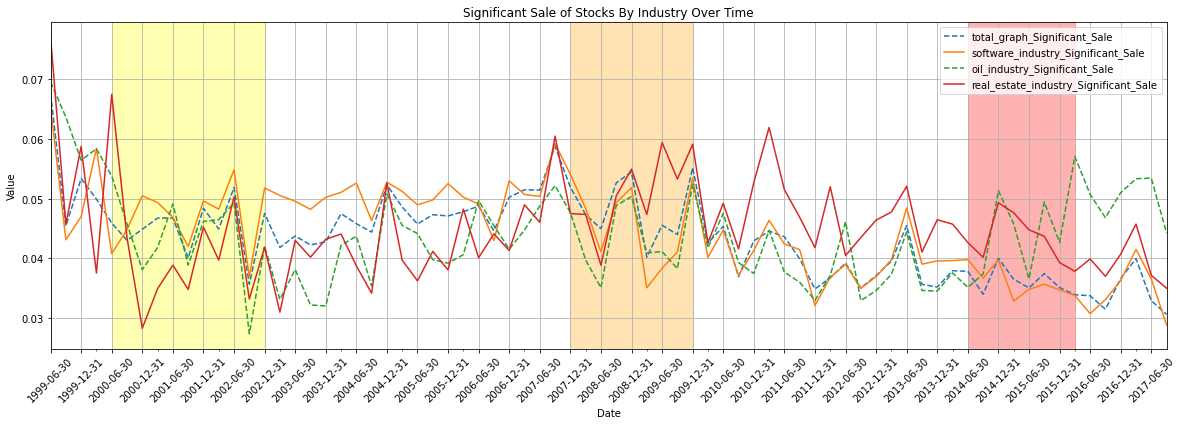

In [107]:
import matplotlib.pyplot as plt

# df.set_index("date", inplace = True)
df1 = create_dataframe_with_substring(df,"Significant")
df2 = drop_cols(df1,"_sector")
df3 = drop_cols(df2,"total")
df3 = drop_cols(df2,"Buy")

plot_dataframe(df3, "Significant Sale of Stocks By Industry Over Time")

# Large Sale Counts By Industry

In [38]:
df1 = create_dataframe_with_substring(df,"big")
df2 = drop_cols(df1,"_sector")
df4 = drop_cols(df2,"buy")


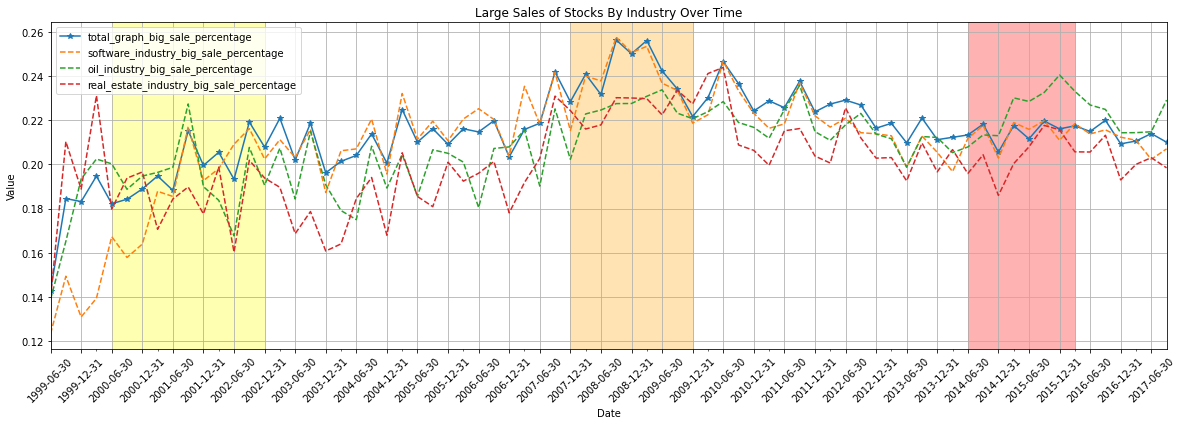

In [45]:
def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    # df_clustering.index = pd.to_datetime(df_clustering["date"].strftime('%Y-%m-%d'))
    df_clustering.index = pd.to_datetime(df_clustering.index, format='%Y-%m-%d')
    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-*", "--", "--", "--", "--", "-", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()


df1 = create_dataframe_with_substring(df,"big")
df2 = drop_cols(df1,"_sector")
df4 = drop_cols(df2,"buy")    

    
plot_dataframe(df4, "Large Sales of Stocks By Industry Over Time")



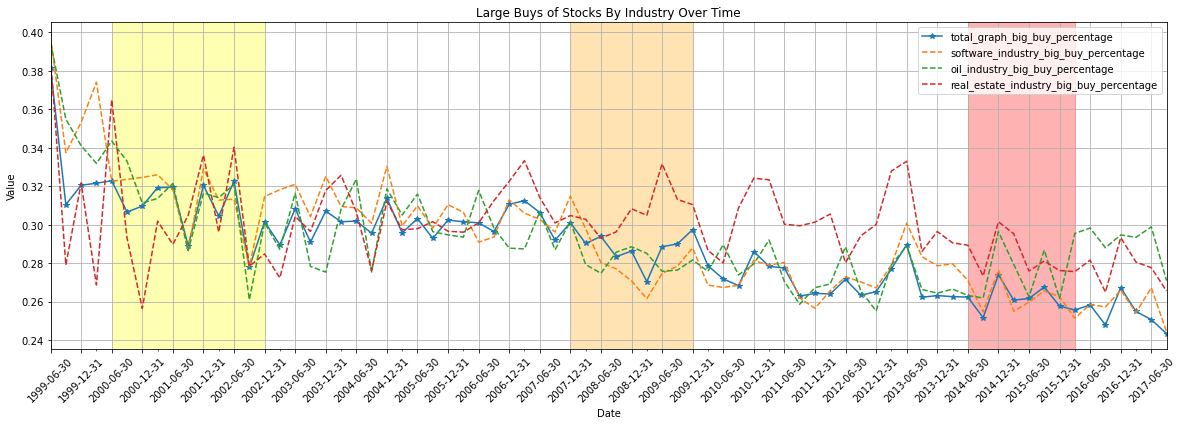

In [46]:
def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    # df_clustering.index = pd.to_datetime(df_clustering["date"].strftime('%Y-%m-%d'))
    df_clustering.index = pd.to_datetime(df_clustering.index, format='%Y-%m-%d')
    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-*", "--", "--", "--", "--", "-", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()


df1 = create_dataframe_with_substring(df,"big")
df2 = drop_cols(df1,"_sector")
df4 = drop_cols(df2,"sale")    

    
plot_dataframe(df4, "Large Buys of Stocks By Industry Over Time")

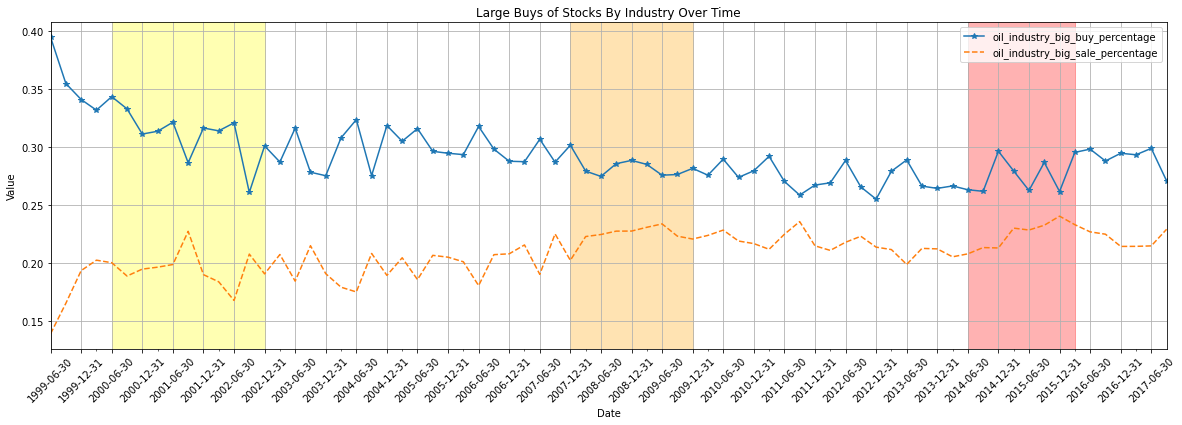

In [47]:
def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    # df_clustering.index = pd.to_datetime(df_clustering["date"].strftime('%Y-%m-%d'))
    df_clustering.index = pd.to_datetime(df_clustering.index, format='%Y-%m-%d')
    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-*", "--", "--", "--", "--", "-", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()


df1 = create_dataframe_with_substring(df,"big")
df1 = create_dataframe_with_substring(df1,"oil")

df2 = drop_cols(df1,"_sector")

    
plot_dataframe(df2, "Large Buys of Stocks By Industry Over Time")